train_sample![WordCloud](./img/wordcloud.png)

In [1]:
#hideInput
try:
    username
except NameError:
    username = 'stranger'

print('Hello, ' + username + '!')

Hello, stranger!


# Lernmodul zur Verarbeitung und Analyse von Textdaten

Das Verarbeiten menschlicher Sprache gilt als Voraussetzung für eine erfolgreiche Mensch-Maschine-Kommunikation. Zusätzlich kann sie dabei helfen eine vom Mensch unternommene Textanalyse zu unterstützen. Handelt es sich bei diesem Kommentar um unerwünschte Inhalte? Verbreitet dieser Beitrag Falschinformationen? Und welche Meinung will der Verfasser mit dieser Rezension zum Ausdruck bringen? Jene Fragestellungen lassen sich also mithilfe computergestützter Methoden der Textanalyse beantworten.

Im folgenden Lernmodul wird speziell versucht im Zuge der Stimmungsanalyse (Sentiment Analysis) die Intention eines Textbeitrages zu identifizieren um bspw. zwischen einer negativen und einer positiven Aussage zu unterscheiden. Diese Unterscheidung übernimmt ein Modell (hier: Klassifikator), welches auf Basis von angereicherten Daten (hier: Vokabular) eine Aussage (hier: Stimmung) über vorliegende Rohdaten (hier: Tweets) trifft.

Die folgende Abbildung verdeutlicht den Weg eines Tweets, welcher die drei Domänen [Daten](#daten), [Modell](#modell) und [Verwendung](#verwendung) durchläuft, bevor letztendlich seine Stimmung vorhergesagt wird:
![Pipeline](./img/flow.png)

**Übersicht über die Lerninhalte:**

1. [Einführung](#1.-Einführung)
    1. [Motivation](#1.1-Motivation)
    2. [Voraussetzungen](#1.2-Voraussetzungen)
2. [Daten](#2.-Daten)
    1. [Textdaten beschaffen](#2.1-Textdaten-beschaffen)
    2. [Textdaten erkunden](#2.2-Textdaten-erkunden)
    3. [Textdaten aufbereiten](#2.3-Textdaten-aufbereiten)
        1. [Zeichen bereinigen](#2.3.1-Zeichen-bereinigen)
        2. [Wörter bereinigen](#2.3.2-Wörter-bereinigen)
        3. [Tweets bereinigen](#2.3.3-Tweets-bereinigen)
3. [Modell](#3.-Modell)
    1. [Textdaten einbetten](#3.1-Textdaten-einbetten)
        1. [Vokabular](#3.1.1-Vokabular)
        2. [Vektorisierung](#3.1.2-Vektorisierung)
        3. [Label](#3.1.3-Label)
        4. [Features](#3.1.4-Features)
    2. [Textdaten klassifizieren](#3.2-Textdaten-klassifizieren)
        1. [Überwachte Klassifikation](#3.2.1-Überwachte-Klassifikation)
        2. [Unüberwachte Klassifikation](#3.2.2-Unüberwachte-Klassifikation)
4. [Verwendung](#4.-Verwendung)
    1. [Textdaten vorhersagen](#4.1-Textdaten-vorhersagen)
        1. [Überwachter Klassifikator](#4.1.1-Überwachter-Klassifikator)
        2. [Unüberwachter Klassifikator](#4.1.2-Unüberwachter-Klassifikator)
5. [Abschluss](#5.-Abschluss)

**Lernziele:**

Die Teilnehmer lernen in der [Datendomäne](#daten) Textdaten in roher Form Schritt für Schritt in kontextbezogene Daten für eine Textanalyse zu transformieren. Daraufhin bewegen sich die Teilnehmer in der [Modelldomäne](#modell), in der sie die Daten in das Modell einbetten um sie von zwei unterschiedlichen Algorithmen klassifizieren zu lassen. Final werden die entstandenen Klassifikatoren in der [Verwendungsdomäne](#verwendung) für eine Vorhersage der Stimmung gebraucht.

**Voraussetzungen:**

- [Lernmodul zum Datenimport und zur Datenvorbereitung mit Pandas](https://projectbase.medien.hs-duesseldorf.de/eild.nrw-module/lernmodul-pandas)

**Aufgabenüberprüfung:**

Dieses Lernmodul nutzt eine Aufgabenüberprüfung, die sich hinter der folgenden Variable verbirgt:

In [2]:
#hideInput
from taskreview.learning_module import LearningModule
texte_lm = LearningModule('data/lernmodul_texte.db')

In [3]:
texte_lm

**Hilfestellung:**

Dieses Lernmodul nutzt verschiedenste Bibliotheken, Objekte und Funktionen. Solltet ihr einmal den Überblick verlieren, gibt euch die `whos` Funktion alle aktiven Variablen aus.

In [4]:
whos

Variable         Type              Data/Info
--------------------------------------------
LearningModule   type              <class 'taskreview.learni<...>g_module.LearningModule'>
texte_lm         LearningModule    <taskreview.learning_modu<...>ct at 0x00000222B3B49320>
username         str               stranger


Dieses Lernmodul nutzt eine hohe Datenmenge, welche die maximal zur Verfügung stehende Speicherkapazität überschreiten kann. Um dem vorzubeugen, können ungenutzte Variablen über die `del` Funktion verworfen werden.

In [5]:
variable = None 
del variable

<div style="background-color: #150458; padding: 5px; width: 100%;"></div>

## 1. Einführung

[Zurück zur Übersicht](#Lernmodul-zur-Verarbeitung-und-Analyse-von-Textdaten)

### 1.1 Motivation

Die Verarbeitung menschlicher Sprache (Natural Language Processing, NLP) ist ein prominentes Forschungsfeld der Informatik mit ähnlichem Bekanntheitsgrad wie die Analyse visueller Daten (Computer Vision), welche bspw. das Erkennen von Bildern (Image Recognition) sowie ihre Manipulation (Image Augmentation) betrachtet. Im ersten Fall wollen wir einen bekannten bzw. alten Bildinhalt klassifizieren, während der zweite Fall einen unbekannten bzw. neuen Bildinhalt erzeugt.

Wechseln wir von Bild- auf Textdaten, lässt sich das Forschungsfeld des _NLP_ auf ähnliche Problemstellungen herunterbrechen, die in der folgenden Auflistung aufgeführt sind:

* Texterkennung (Text Recognition)
  * Spracherkennung (Speech Recognition)
  * Stimmungsanalyse (Sentiment Analysis)
* Textmanipulation (Text Augmentation)
  * Maschinelle Übersetzung (Machine Translation)
  * Automatisches Antworten (Question Answering)

Dieses Lernmodul beschäftigt sich mit der ersten Problemstellung, also der Texterkennung, im besonderen mit der Unterscheidung verschiedener Stimmungen, welche der Verfasser eines Textes gehabt haben könnte. Ein aktuelles Anwendungsbeispiel ist die Identifikation von Hassreden, wie sie bspw. von [Facebook](https://www.facebook.com/) im Zuge ihrer [Community Standards](https://www.facebook.com/communitystandards/hate_speech) verboten wurden und erkannt werden müssen. Auch könnte man ein Stimmungsbild der Gesellschaft über die Auswertung von Beiträgen auf Twitter betrachten, welches in Krisenzeiten als Entscheidungshilfe für geplante Maßnahmen dienen kann.

### 1.2 Voraussetzungen

Dieses Lernmodul nimmt sich [NumPy](https://numpy.org/) für numerische Berechnungen und [Pandas](https://pandas.pydata.org/) für die Verarbeitung der Daten zur Hilfe. Letztere Bibliothek konntet ihr bereits im [Lernmodul zum Datenimport und zur Datenvorbereitung mit Pandas](https://projectbase.medien.hs-duesseldorf.de/eild.nrw-module/lernmodul-pandas) kennen lernen.

In [6]:
import numpy as np
import pandas as pd

Dazu werden die folgenden Skripte zum Verarbeiten, Modellieren & Visualisieren der Daten benötigt:

In [7]:
from utils import data_functions as df
from utils import model_functions as mf
from utils import vis_functions as vf

<div style="background-color: #150458; padding: 5px; width: 100%;"></div>

## 2. Daten

[Zurück zur Übersicht](#Lernmodul-zur-Verarbeitung-und-Analyse-von-Textdaten)

In der Datendomäne beschaffen wir uns zunächst einen Datensatz, welcher aus vielen Beispielen besteht, der die Menge an Daten bildet. Ein Beispiel umfasst dabei mindestens ein, wenn nicht sogar mehrere Merkmale. Ein Merkmal wird dabei durch einen numerischen oder symbolischen Wert verkörpert, der in unserem Fall ein Textbeitrag (Inhalt eines Tweets), aber auch ein Zeitstempel (Veröffentlichung des Tweets) sein kann. 

Im weiteren Verlauf dieses Kapitels werden die beschafften Daten zunächst begutachtet und auf Basis ihrer Merkmale vorgefiltert. Daraufhin werden die übrig gebliebenen Daten im Abschnitt [Textdaten aufbereiten](#2.3-Textdaten-aufbereiten) verarbeitet, um sie in der darauffolgenden Modelldomäne zu nutzen. Die Aufbereitung eines Textbeitrags läuft dabei folgendermaßen ab:

![Daten](./img/data_flow.png)

### 2.1 Textdaten beschaffen

Wo findet man in der heutigen Zeit aktuelle Daten, welche eine eigene Meinung enthalten? Na auf dem Kurznachrichtendienst [Twitter](https://twitter.com) natürlich! 

Unser Datensatz wird dabei ungefiltert von Twitter extrahiert und monatlich unter der [CC 4.0 International](https://creativecommons.org/licenses/by/4.0/legalcode) Lizenz veröffentlicht [[1]](#1).

Unter `data/tweets/` finden sich ein Teil dieser Veröffentlichung als JSON, welche wir zunächst als Rohdateien unter der `twitter` Variable wie folgt abspeichern.

In [8]:
twitter = df.load_json()

Um die Funktionalität von Pandas nutzen zu können, wird aus jedem JSON in `twitter` ein DataFrame.

In [9]:
twitter = map(pd.DataFrame, twitter)

Das Zusammenfügen dieser resultiert in einem einzelnen DataFrame, welcher alle Daten enthält.

In [10]:
twitter = pd.concat(twitter, copy=False)

Das war's auch schon mit der Beschaffung der Daten. Als nächstes gilt es die noch unbekannten Daten zu erkunden.

### 2.2 Textdaten erkunden

Wie im [Lernmodul zum Datenimport und zur Datenvorbereitung mit Pandas](https://projectbase.medien.hs-duesseldorf.de/eild.nrw-module/lernmodul-pandas) kennengelernt, lässt sich über die `head()` Funktionalität der Kopf des Datensatzes betrachten. Wie schaut dieser aus?

In [11]:
twitter.head()

,twista,type,id,user,created_at,recorded_at,source,retweets,favourites,lang,...,screen_name,location,description,url,verified,followers,friends,listed,statuses,refers_to
0,0.3.4b1,status,1233850617996726274,759488216,2020-02-29T20:24:45+00:00,2020-02-29T20:24:59.835143+00:00,"<a href=""http://twitter.com/download/iphone"" r...",0.0,0,de,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.3.4b1,status,1233364221188026370,114508061,2020-02-28T12:11:59+00:00,2020-03-01T11:09:17.015566+00:00,"<a href=""http://www.sueddeutsche.de/"" rel=""nof...",51.0,145,de,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.3.4b1,status,1233850617870913541,2902622080,2020-02-29T20:24:45+00:00,2020-02-29T20:24:59.839449+00:00,"<a href=""http://www.playstation.com"" rel=""nofo...",0.0,0,de,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.3.4b1,status,1233701038483542016,140410244,2020-02-29T10:30:23+00:00,2020-02-29T20:24:59.842019+00:00,"<a href=""https://about.twitter.com/products/tw...",3.0,8,de,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.3.4b1,status,1233837417959952385,2335677408,2020-02-29T19:32:18+00:00,2020-03-01T11:42:05.807013+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",509.0,1773,de,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Leider liefert die `head()` Funktionalität nicht die Größe des Datensatzes zurück...

**Aufgabe: Wie viele Beispiele sind im `twitter` Datensatz enthalten?**

In [12]:
#hideInput
texte_lm.show_task(221)

Output()

Output()

Output()

In [13]:
#solution
twitter.shape[0]

450004

**Aufgabe: Wie viele Werte liegen pro Beispiel vor? Aus wie vielen Merkmalen besteht der `twitter` Datensatz?**

In [14]:
#hideInput
texte_lm.show_task(222)

Output()

Output()

Output()

In [15]:
#solution
twitter.shape[1]

26

Als erstes kümmern wir uns um die Aktualität der Daten.

**Aufgabe: Über welches Merkmal können wir Tweets identifizieren, die vor dem Jahr 2020 entstanden sind?**

In [16]:
#hideInput
texte_lm.show_task(223)

Output()

Output()

Output()

In [17]:
#solution
twitter.columns

Index(['twista', 'type', 'id', 'user', 'created_at', 'recorded_at', 'source',
       'retweets', 'favourites', 'lang', 'hashtags', 'urls', 'mentions',
       'mentioned_ids', 'text', 'name', 'screen_name', 'location',
       'description', 'url', 'verified', 'followers', 'friends', 'listed',
       'statuses', 'refers_to'],
      dtype='object')

Aus welchen Jahren stammen unsere Tweets?

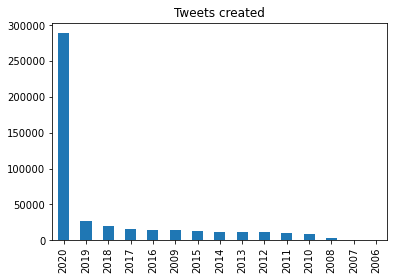

In [18]:
twitter = vf.plot_tweet_year(twitter)

Anscheinend enthält unser Datensatz veraltete Tweets. Da sich unsere Fragestellung sich auf aktuelle Inhalte fixiert, verwerfen wir ältere Tweets wie folgt:

In [19]:
twitter = twitter.loc[twitter['year'] == 2020]

Als Nächstes kümmern wir uns um die Sprache, die einem jeden Tweet hinterlegt ist. Welche Sprachen sind vertreten?

In [20]:
twitter['lang'].unique()

array(['de', 'en', 'pt', 'in', 'es', 'it', 'fr', 'und', 'tr', 'ca', 'da',
       'sl', 'pl', 'hi', 'nl', 'no', 'el', 'ru', 'fa', 'sv', 'et', 'cy',
       'ro', 'tl', 'ja', 'ar', 'ht', 'th', 'fi', 'ko', 'vi', 'zh', 'is',
       'hu', nan, 'cs', 'eu', 'lt', 'iw', 'ur', 'kn', 'lv'], dtype=object)

Anscheinend enthält unser Datensatz verschiedenste Sprachen. Da sich unsere Fragestellung auf deutsche Inhalte fixiert, verwerfen wir anderweitigte Tweets wie folgt:

In [21]:
twitter = twitter.loc[twitter['lang'] == 'de']

Zum Abschluss konzentrieren wir uns auf die gewünschten Textbeiträge. Da unser Datensatz keine relevanten Metadaten enthält, extrahieren wir lediglich die Tweets vom DataFrame `twitter` in eine DataSeries `tweets`.

In [22]:
tweets = twitter['text']
del twitter
tweets.head()

0    a) Venezuela 2019\nb) Deutschland während nCov...
1    Assad und Putin wollen Erdoğan eine Lektion er...
2    Ich hoff die Dinger kann ich a amol fahren und...
3    Trotz aussichtsloser Lage der Wehrmacht ergebe...
4    Mein Kommentar zur Causa Hopp für @derspiegel....
Name: text, dtype: object

Beim Extrahieren der Tweets werden ausnahmslos alle Beispiele berücksichtigt. Das gilt auch für fehlende Tweets, die in der Menge an Beispielen untergegangen sind. Sind unsere Daten nun bereit zur Aufbereitung?

**Aufgabe: Wie viele Werte fehlen im `tweets` Datensatz?**

In [23]:
#hideInput
texte_lm.show_task(224)

Output()

Output()

Output()

In [24]:
#solution
tweets.isna().sum()

103453

Da fehlende Werte von den folgenden Schritten nicht verarbeitet werden können, entfernen wir sie wie folgt:

In [25]:
tweets.dropna(inplace=True)

Der Übersicht halber fügen wir ein frei erfundenes Beispiel an, um die folgenden Verarbeitungsschritte besser nachvollziehen zu können.

> ⚠️ Dieser Tweet enthält viele unnütze Zeichen 😟 die wir lieber verwerfen.
> 
> Das wurde uns von @user unter https://example.org verraten #danke

Diesen ausgedachten Tweet fügen wir wie folgt an unsere Daten an:

In [26]:
example = '⚠️ Dieser Tweet enthält viele unnütze Zeichen 😟 die wir lieber verwerfen. \n Das wurde uns von @user unter https://example.org verraten! #danke'
tweets = tweets.append(pd.Series(example), ignore_index=True)

Das war's auch schon mit der Erkundung der Daten. Bis jetzt haben wir lediglich fehlende Beispiele verworfen, nicht aber vorhandene Beispiele verändert. Bevor das passiert, behalten wir lieber eine Kopie der Daten, auf die wir im späteren Verlauf des Lernmoduls noch zurückgreifen werden.

In [27]:
tweets_copy = tweets.copy()

**Aufgabe: Wozu kann eine solche Kopie gut sein?**

In [28]:
#hideInput
texte_lm.show_task(225)

Output()

Output()

Output()

### 2.3 Textdaten aufbereiten

Innerhalb der Datenaufbereitung werden wir jeden Tweet anhand seiner Bestandteile (Zeichen, Wörter, Länge) verarbeiten. Exemplarische Verarbeitungsschritte wurden bereits zu [Anfang](#2.-Daten) dieses Kapitels betrachtet. Aber schauen wir uns erst einmal das eben angefügte Beispiel an.

**Aufgabe: Mit welchem Befehl kommen wir zum letzten Tweet im `tweets` Datensatz?**

In [29]:
#hideInput
texte_lm.show_task(231)

Output()

Output()

Output()

In [30]:
#solution
tweets.iloc[-1]

'⚠️ Dieser Tweet enthält viele unnütze Zeichen 😟 die wir lieber verwerfen. \n Das wurde uns von @user unter https://example.org verraten! #danke'

Leider enthält unser ausgedachter Tweet allerhand Elemente, die wir gesondert behandeln müssen...

#### 2.3.1 Zeichen bereinigen

**Aufgabe: Welche Elemente befinden sich letzten Tweet, die wir verarbeiten müssen?**

In [31]:
#hideInput
texte_lm.show_task(232)

Output()

Output()

Output()

Fangen wir mit den Emojis an. Diese werden über die `process_emojis()` Funktion wie folgt verarbeitet:

In [32]:
tweets = df.process_emojis(tweets)

**Aufgabe: Die `process_emojis()` Funktion kümmert sich um ausgewählte Emojis. Was passiert mit ihnen?**

In [33]:
#hideInput
texte_lm.show_task(233)

Output()

Output()

Output()

In [34]:
#solution
tweets.iloc[-1]

'⚠️ Dieser Tweet enthält viele unnütze Zeichen schlecht die wir lieber verwerfen. \n Das wurde uns von @user unter https://example.org verraten! #danke'

Nun können wir spezielle Zeichenketten, wie die URL _https://example.org_ verarbeiten. Zusätzlich werden über die `process_strings()` Funktion Sonderzeichen wie _@_ und _\t_ wie folgt behandelt:

In [35]:
tweets = df.process_strings(tweets)

**Aufgabe: Die `process_strings()` Funktion kümmert sich um spezielle Zeichenketten. Was passiert mit ihnen?**

In [36]:
#hideInput
texte_lm.show_task(234)

Output()

Output()

Output()

In [37]:
#solution
tweets.iloc[-1]

'⚠️ Dieser Tweet enthält viele unnütze Zeichen schlecht die wir lieber verwerfen.  Das wurde uns von  unter  verraten! #danke'

Als letztes kümmern wir uns um verbleibende Symbole, wie Satzzeichen, über die `process_symbols()` Funktion wie folgt:

In [38]:
tweets = df.process_symbols(tweets)

**Aufgabe: Die `process_symbols()` Funktion kümmert sich generell um Sonderzeichen. Was passiert mit ihnen?**

In [39]:
#hideInput
texte_lm.show_task(235)

Output()

Output()

Output()

In [40]:
#solution
tweets.iloc[-1]

' Dieser Tweet enthält viele unnütze Zeichen schlecht die wir lieber verwerfen  Das wurde uns von  unter  verraten danke'

#### 2.3.2 Wörter bereinigen

Nach der Bereinigung im vorherigen Abschnitt bleiben in der Theorie lediglich ganze Wörter übrig. Jetzt können wir jeden Tweet in seine Bestandteile zerlegen. Dieser Schritt geht mit der Funktionsweise eines [Tokenizer](https://de.wikipedia.org/wiki/Tokenizer) einher, welcher lediglich den kompletten Tweet in einzelne Token, also Wörter, aufteilt. Diese lassen sich besser verarbeiten, als ein ganzer Satz.

Die Zerteilung der Zeichenkette anhand des Leerzeichens bringt uns eine Liste von Wörtern innerhalb eines Tweets. Dabei werden alle Wörter wie folgt in Kleinschreibung abgebildet:

In [41]:
def lower(tweet):
    """Lower tweets"""
    
    return tweet.lower()

In [42]:
def split(tweet):
    """Split tweets"""
    
    return tweet.split()

In [43]:
tweets = tweets.apply(lower).apply(split)
tweets.iloc[-1]

['dieser',
 'tweet',
 'enthält',
 'viele',
 'unnütze',
 'zeichen',
 'schlecht',
 'die',
 'wir',
 'lieber',
 'verwerfen',
 'das',
 'wurde',
 'uns',
 'von',
 'unter',
 'verraten',
 'danke']

Jetzt besteht jeder Tweet nicht mehr nur aus einer Zeichenkette, sondern aus ganz vielen Wörtern. Aus Analysegründen fassen wir alle Wörter zu einer großen Sammlung zusammen, was die `aggregate_words()` Funktion wie folgt umsetzt:

In [44]:
def aggregate_words(tweets):
    """Aggregate words from tweets"""
    
    all_words = []
    for sentence in tweets:
        for word in sentence:
            all_words.append(word)
            
    return all_words

In [45]:
all_words = aggregate_words(tweets)

**Aufgabe: Eine Sammlung aller Wörter findet sich in der `all_words` Liste. Wie viele verschiedene Wörter sind getweetet worden?**

In [46]:
#hideInput
texte_lm.show_task(236)

Output()

Output()

Output()

In [47]:
#solution
len(pd.Series(all_words).unique())

234030

Nachdem wir alle Wörter gesammelt haben, interessieren uns die beliebtesten Wörter der Tweeter. An dieser Stelle greifen wir auf das Natural Language Toolkit ([NLTK](https://www.nltk.org/)) zurück, welches eine Häufigkeitsverteilung einer Liste über die `FreqDist()` Funktion wie folgt erstellt:

In [48]:
from nltk.probability import FreqDist
fd = FreqDist(all_words)

**Aufgabe: Die `fd` Verteilung basiert auf allen getweeteten Wörtern. Wie lauten die drei häufigsten Wörter?**

In [49]:
#hideInput
texte_lm.show_task(237)

Output()

Output()

Output()

In [50]:
#solution
fd.most_common(3)

[('die', 62102), ('und', 53780), ('der', 45439)]

Es ist nicht überraschend, dass sich Artikel, Pronomen oder Konjunktionen als die am häufigsten verwendeten Wörter entpuppen. Schauen wir uns zusätzlich die Häufigkeitsverteilung der 25 beliebtesten Wörter an.

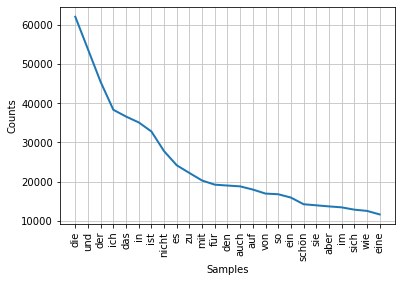

In [51]:
fd.plot(25)

Auch hier scheinen Artikel, Pronomen und Konjunktionen stark vertreten zu sein. Das bringt uns zu der Frage, welche Stimmung diese Wörter eigentlich vertreten?

Solche Wörter, werden im Kontext des _NLP_ als Stoppwörter bezeichnet, da sie keine Wertung implizieren, wie es bspw. ein Adjektiv, wie _gut_ oder _schlecht_ tun würde. Stoppwörter lassen sich daher ähnlich wie das Rauschen aus einer Nachricht (hier: Tweet) entfernen, ohne dass die Information (hier: Stimmung) dieser Nachricht verloren geht.

Wir werden also im folgenden Schritt alle Stoppwörter entfernen. Um sie zu identifizieren, importieren wir sie über die `load_stop_words()` Funktion in eine Liste `stop_words` wie folgt:

In [52]:
stop_words = df.load_stop_words()
stop_words.Wort.values

array(['der', 'die', 'das', 'ein', 'eine', 'einer', 'einen', 'ich', 'du',
       'er', 'sie', 'es', 'wir', 'ihr', 'sie', 'bin', 'bist', 'ist',
       'sind', 'seid', 'und', 'oder', 'doch', 'aber', 'an', 'am', 'in',
       'von', 'vor'], dtype=object)

Hätte man lediglich die meist genutzten Wörter aus der Häufigkeitsverteilung oben genommen, wäre man Gefahr gelaufen, relevante Wörter, wie _schön_, ebenfalls zu entfernen.

Bevor wir alle Stoppwörter aus den Tweets entfernen, fragen wir uns erst einmal, wie viel Prozent unseres Datensatzes wir dadurch verlieren würden? Dies lässt sich über die `content_loss()` Funktion wie folgt berechnen:

In [53]:
def content_loss(text): # Execution time too long
    stop_words_list = stop_words['Wort'].values.tolist()
    content = [word for word in text if word not in stop_words_list]
    return 1.0 - len(content) / len(text)

In [54]:
content_loss(all_words)

0.18122912093200094

Um die Stoppwörter endgültig aus unseren Tweets zu entfernen, werfen wir die `filter_tokens()` Funktion wie folgt an.

In [55]:
def filter_tokens(tweets):
    """Filter tokens in tweets"""
    
    row_list = []
    stop_words_list = stop_words['Wort'].values.tolist()  
    for row in tweets:
        
        token_list = []
        for token in row:
            
            if token not in stop_words_list:
                if len(token) > 1:
                    token_list.append(token)
                    
        row_list.append(token_list)
    
    return pd.Series(row_list)

In [56]:
tweets = filter_tokens(tweets)
tweets.head()

0    [venezuela, deutschland, während, ncovc, nk, i...
1    [assad, putin, wollen, erdoan, lektion, erteil...
2    [hoff, dinger, kann, amol, fahren, können, meh...
3    [trotz, aussichtsloser, lage, wehrmacht, ergeb...
4             [mein, kommentar, zur, causa, hopp, für]
dtype: object

Damit ist unsere Sammlung von Wörter nicht mehr aktuell. Der Einfachheit halber sammeln wir sie erneut über die `aggregate_words()` Funktion.

In [57]:
all_words = aggregate_words(tweets)

Nun können wir eine Aussage darüber treffen, welche Wörter mit Ausnahme der Stoppwörter am häufigsten benutzt werden? Dazu ließe sich wiederum die `FreqDist()` Funktion nutzen. 

Alternativ zur bereits bekannten Häufigkeitsverteilung lassen sich im Kontext des _NLP_ sog. Schlagwortwolken erstellen. An dieser Stelle greifen wir auf die [WordCloud](https://amueller.github.io/word_cloud/) Bibliothek und speziell auf ihre `WordCloud()` Funktion wie folgt zurück:

In [58]:
from wordcloud import WordCloud
wc = WordCloud()

Wie sehen nun die häufigsten Wörter aus?

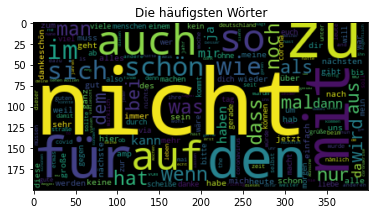

In [59]:
most_common_words = wc.generate_from_frequencies(FreqDist(all_words))
del all_words
vf.plot_image(most_common_words, 'Die häufigsten Wörter')

#### 2.3.3 Tweets bereinigen

Da uns der vergangene Abschnitt einige Wörter gekostet hat, wollen wir nun verbliebenen Wörter pro Tweet zählen. Ein Tweet, der nur noch wenigene Wörter besitzt, ist womöglich keine gute Datenquelle. Da Twitter kein Zeichenminimum setzt, kann unser Datensatz auch Tweets enthalten, die wenig bis gar keinen Inhalt repräsentieren. Um solche Tweets zu identifizieren berechnen wir die Wortlänge aller Tweets wie folgt:

In [60]:
tweets_length = [len(tweet) for tweet in tweets]

**Aufgabe: Die `tweets_length` Liste enthält die Wortlänge aller Tweets. Wie viele Wörter besitzt der kürzeste Tweet?**

In [61]:
#hideInput
texte_lm.show_task(238)

Output()

Output()

Output()

In [62]:
#solution
min(tweets_length)

0

Hoffentlich handelt es sich um einen Ausreißer. Das verifizieren wir wiederum mit einer Häufigkeitsverteilung. Dieses Mal aber als einfaches Histogramm über die `plot_tweet_length_distribution()` Funktion:

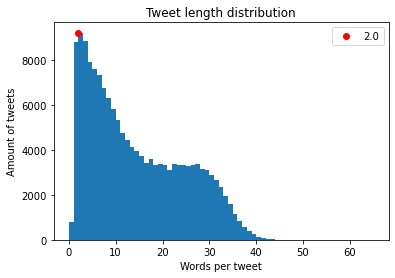

In [63]:
vf.plot_tweet_length_distribution(tweets_length)

Die meisten Tweets scheinen nach Entfernen der Stoppwörter nur noch wenige Wörter lang zu sein. Wir behalten lediglich Tweets, die mehr als zwei Wörter lang sind:

In [64]:
min_words_per_tweet = 2
tweets = tweets[tweets.map(len) > min_words_per_tweet]

Zeit für ein Status Quo: wie groß sind unsere Verluste nach Bereinigen von Zeichen, Wörtern und zu kurz geratenen Tweets?

**Aufgabe: Wie viel Prozent bleiben nach Aufbereitung der Daten im Vergleich zu den ursprünglichen Tweets übrig?**

In [65]:
#hideInput
texte_lm.show_task(239)

Output()

Output()

Output()

In [66]:
#solution
tweets.size / tweets_copy.size

0.8801801055923169

Mit dem bereinigten Datensatz geht es nun weiter in die Modelldomäne, in der wir uns erstmal um die Überführung der Daten in das Modell kümmern.

<div style="background-color: #150458; padding: 5px; width: 100%;"></div>

## 3. Modell

[Zurück zur Übersicht](#Lernmodul-zur-Verarbeitung-und-Analyse-von-Textdaten)

In der Modelldomäne beschäftigen wir uns zunächst mit einem Klassifikator als Vorhersagemodell für unsere bereinigten Daten. NLTK ermöglicht uns die Verwendung der folgenden Klassifikationsarten:

* Überwachte Klassifikation mittels Naive Bayes Algorithmus
* Unüberwachte Klassifikation mittels K-means Clustering

Während unsere Beispiele (hier: Tweets) aus den Daten (noch) keiner Klasse (hier: Stimmung) zugeordnet sind, benötigt ein überwachter Klassifikator eben diese Zuordnung für seinen Lernprozess. Aus diesem Grund werden wir im Verlauf dieses Kapitels unsere Beispiele mit einer Stimmung anreichern, welche als Label für eine überwachte Klassifikation fungiert. Zudem liegen unsere Beispiele noch immer als Textdaten vor - unsere Klassifikationsalgorithmen benötigen indes numerische Daten.

Welche Schritte notwendig sind um diese Probleme zu behandeln, verdeutlicht die folgende Abbildung:

![Model](./img/model_flow.png)

### 3.1 Textdaten einbetten

Da unsere bereinigten Daten weiterhin als Text vorliegen, benötigen wir als erstes eine Überführung der Daten in eine Form, die von unserem Modell (hier: Klassifikator) verstanden wird. Man spricht in diesem Zusammenhang vom [Embedding](https://en.wikipedia.org/wiki/Word_embedding) der Wörter.

Es gibt viele Verfahren, um das symbolische Wort auf einen numerischen Wert abzubilden, die im [Anhang](#5.-Abschluss) referenziert sind, für dieses Lernmodul aber zu weit gingen. Daher schlagen wir die Wörter einfach in einer Art Vokabular nach, das für jedes Wort einen eigenen Wert besitzt. Wie sieht unser Vokabular nun aus?

#### 3.1.1 Vokabular

Das Vokabular wurde über die Universität Leipzig unter der [CC BY-NC-SA 3.0 DE](https://creativecommons.org/licenses/by-nc-sa/3.0/de/) Lizenz veröffentlicht [[2]](#2) und besteht aus negativ bzw. positiv annotierten Wörtern der deutschen Sprache. Die Stimmungslage ist im Intervall von `[-1, 1]` bzw. `['negativ', 'positiv']` begrenzt. Schlagen wir neutrale Wörter, wie _und_ bzw. _oder_ im Vokabular nach, bekommen wir einen Stimmungswert von _0_, also ohne Gewichtung, zurückgegeben. Je positiver ein Wort, desto höher sein Stimmungswert.

Unser Modell interessiert sich dabei lediglich für die zwei Extrema und soll als binärer Klassifikator zwischen negativen und posiven Tweets differenzieren. Wir vergeben daher die Labels wie folgt:

In [67]:
labels = ['negativ', 'positiv']

Zunächst holen wir uns die negativen Wörter für das Vokabular über die `load_vocabulary()` Funktion wie folgt:

In [68]:
negative = df.load_vocabulary(labels[0]) # Negative
negative.head()

,Wort,Wert,Deklination,Stimmung
0,Abbruch|NN,-0.0048,"Abbruches,Abbrüche,Abbruchs,Abbrüchen\r",negativ
1,Abdankung|NN,-0.0048,Abdankungen\r,negativ
2,Abdämpfung|NN,-0.0048,Abdämpfungen\r,negativ
3,Abfall|NN,-0.0048,"Abfalles,Abfälle,Abfalls,Abfällen\r",negativ
4,Abfuhr|NN,-0.3367,Abfuhren\r,negativ


Derselbe Weg führt uns zum positiven Vokabular.

In [69]:
positive = df.load_vocabulary(labels[1]) # Positive
positive.head()

,Wort,Wert,Deklination,Stimmung
0,Abschluß|NN,0.004,"Abschlüße,Abschlußs,Abschlußes,Abschlüßen\r",positiv
1,Abstimmung|NN,0.004,Abstimmungen\r,positiv
2,Agilität|NN,0.004,NaN,positiv
3,Aktivität|NN,0.004,Aktivitäten\r,positiv
4,Aktualisierung|NN,0.004,Aktualisierungen\r,positiv


Ähnlich wie beim Einlesen des `twitter` Datensatzes, führen wir das negative und das positive Vokabular im DataFrame `vocab` zusammen...

In [70]:
vocab = pd.concat([negative, positive])
del negative, positive

...und kümmern uns um ein paar Verschönerungen mithilfe der `format_vocab()` Funktion. Dabei werden insbesondere alle Deklinationsformen in eine eigene Reihe überführt und mit ihrem Stammwort versehen.

In [71]:
vocab = df.format_vocabulary(vocab)
vocab.head()

,Stamm,Wert,Stimmung,Typ,Wort
0,Abbruch,-0.0048,negativ,NN,Abbruch
1,Abbruch,-0.0048,negativ,NN,Abbruches
2,Abbruch,-0.0048,negativ,NN,Abbrüche
3,Abbruch,-0.0048,negativ,NN,Abbruchs
4,Abbruch,-0.0048,negativ,NN,Abbrüchen


Nun können wir unser Vokabular genauer betrachten.

**Aufgabe: Welche Wort-Typen sind im `vocab` Vokabular vorhanden?**

In [72]:
#hideInput
texte_lm.show_task(311)

Output()

Output()

Output()

In [73]:
#solution
vocab['Typ'].unique()

array(['NN', 'VVINF', 'ADJX', 'ADV'], dtype=object)

Wir visualisieren alle negativen Nomen mithilfe der bereits bekannten Schlagwortwolke:

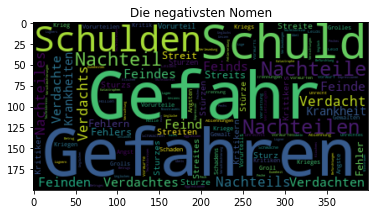

In [74]:
neg_nouns = vocab[(vocab['Stimmung'] == 'negativ') & (vocab['Typ'] == 'NN')] # Only negative nouns
most_neg_nouns = wc.generate_from_frequencies(pd.Series(neg_nouns.Wert.values * (-100), index=neg_nouns.Wort).to_dict())
vf.plot_image(most_neg_nouns, 'Die negativsten Nomen')

Analog visualisieren wir alle positiven Adjektive in unserem Vokabular.

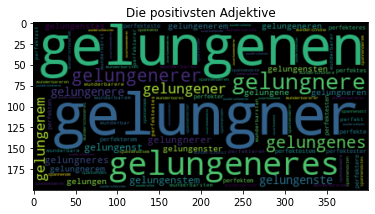

In [75]:
pos_adj = vocab[(vocab['Stimmung'] == 'positiv') & (vocab['Typ'] == 'ADJX')] # Only positive adjectives
most_pos_adj = wc.generate_from_frequencies(pd.Series(pos_adj.Wert.values * (100), index=pos_adj.Wort).to_dict())
vf.plot_image(most_pos_adj, 'Die positivsten Adjektive')

**Aufgabe: Fällt das `vocab` Vokabular eher negativ oder eher positiv aus?**

In [76]:
#hideInput
texte_lm.show_task(312)

Output()

Output()

Output()

In [77]:
#solution
vocab.mean()

Wert   -0.04533
dtype: float64

Wie bereits für die Tweets halten wir nach fehlenden Werten Ausschau...

**Aufgabe: In welcher Spalte des `vocab` Vokabulars fehlen Werte?**

In [78]:
#hideInput
texte_lm.show_task(313)

Output()

Output()

Output()

In [79]:
#solution
vocab.isna().describe()

,Stamm,Wert,Stimmung,Typ,Wort
count,31274,31274,31274,31274,31274
unique,1,1,1,1,2
top,False,False,False,False,False
freq,31274,31274,31274,31274,30467


Anstatt sie zu streichen, werden sie mit einer leeren Zeichenkette ersetzt. Dies verhindert, dass unser Vokabular schrumpft, was wir unbedingt verhindern wollen, da unser Modell auf Basis des Vokabulars erzeugt wird.

In [80]:
vocab.fillna('', inplace=True)

**Aufgabe: Welchen Stimmungswert besitzt das Adjektiv _gut_ im `vocab` Vokabular?**

In [81]:
#hideInput
texte_lm.show_task(314)

Output()

Output()

Output()

In [82]:
#solution
vocab.loc[(vocab['Typ'] == 'ADJX') & (vocab['Wort'] == 'gut')]

,Stamm,Wert,Stimmung,Typ,Wort
13353,gut,0.3716,positiv,ADJX,gut


**Aufgabe: Wie lautet das "schlechteste", also das am schlechtesten annotierte Wort im `vocab` Vokabular?**

In [83]:
#hideInput
texte_lm.show_task(315)

Output()

Output()

Output()

In [84]:
#solution
vocab.sort_values('Wert').head()

,Stamm,Wert,Stimmung,Typ,Wort
1021,Gefahr,-1.0000,negativ,NN,Gefahr
1022,Gefahr,-1.0000,negativ,NN,Gefahren
2017,Schuld,-0.9686,negativ,NN,Schulden
2016,Schuld,-0.9686,negativ,NN,Schuld
25825,unnötig,-0.9463,negativ,ADJX,unnötigsten


Unser Vokabular ist fertig. Als nächstes richten wir den Fokus wieder auf unsere Tweets.

#### 3.1.2 Vektorisierung

Innerhalb der Vektorisierung überführen wir die symbolischen Textbeiträge in numerische Werte. Dies geschieht im Normalfall über Häufigkeitsverteilungen. Je öfter ein Wort im Text vorkommt, desto wichtiger scheint es zu sein, was sich in der Vektorisierung wiederspiegelt.

In diesem Fall aber benutzen wir das bekannte Vokabular und überführen jedes einzelne Wort eines Tweets in seinen Stimmungswert. Das Wort _gut_ kriegt dabei den Stimmungswert 0.37 zugewiesen, wie bereits in einer der vorherigen Aufgaben behandelt wurde.

In [85]:
vocab.loc[vocab['Wort'] == 'gut'].Wert

13353    0.3716
Name: Wert, dtype: float64

Für eine performante Vektorisierung benötigen wir einen Look-up-table aus den Schlüssel-/Wertpaaren `{ Wort : Stimmungswert }`.
 
Das Vokabular dient dabei als Look-up (LUT) für einen Tweet.

In [86]:
lookup = pd.Series(vocab.Wert.values, index=vocab.Wort.str.lower()).to_dict()

Die Vektorisierung wird nun über die `vectorize()` Funktion abgeschlossen.

In [87]:
def vectorize(tweet):
    """Vectorize tweets based on vocabulary"""
    
    return [lookup.get(a) for a in tweet if lookup.get(a)]

In [88]:
tweets = tweets.to_frame(name='Token')
tweets['Vector'] = tweets['Token'].apply(vectorize)
tweets.head()

,Token,Vector
0,"[venezuela, deutschland, während, ncovc, nk, i...",[]
1,"[assad, putin, wollen, erdoan, lektion, erteil...","[-0.0048, -0.0468, -0.0603, -0.1483, -0.0048]"
2,"[hoff, dinger, kann, amol, fahren, können, meh...",[0.2318]
3,"[trotz, aussichtsloser, lage, wehrmacht, ergeb...","[-0.0048, -0.183]"
4,"[mein, kommentar, zur, causa, hopp, für]",[]


#### 3.1.3 Label

Dieser Schritt fügt den Tweets eine Stimmung auf Basis der vektorisierten Tokens hinzu. Dabei summieren wir die jeweiligen Stimmungswerte aller im Tweet enthaltenen Wörter und schauen ob ihre Summe negativ oder positiv ausfällt. 

Erinnern wir uns zurück an die Stimmungslage im Intervall `['negativ', 'positiv']` annotiert die `label()` Funktion im folgenden jeden Tweet anhand seiner Vektoren.

In [89]:
def label(tweet):
    """Label tweets according to vocabulary."""
    
    score = sum(tweet)
            
    if score > 0.0:
        return 'positiv'
    elif score < 0.0:
        return 'negativ'
    else:
        return 'neutral'

In [90]:
tweets['Label'] = tweets['Vector'].apply(label)
tweets.head()

,Token,Vector,Label
0,"[venezuela, deutschland, während, ncovc, nk, i...",[],neutral
1,"[assad, putin, wollen, erdoan, lektion, erteil...","[-0.0048, -0.0468, -0.0603, -0.1483, -0.0048]",negativ
2,"[hoff, dinger, kann, amol, fahren, können, meh...",[0.2318],positiv
3,"[trotz, aussichtsloser, lage, wehrmacht, ergeb...","[-0.0048, -0.183]",negativ
4,"[mein, kommentar, zur, causa, hopp, für]",[],neutral


**Aufgabe: Welches Label bekommt ein Tweet von der `label()` Funktion, dessen Summe _0_ ist, weil entweder keine Wörter gefunden werden oder sich die Stimmungswerte aufheben?**

In [91]:
#hideInput
texte_lm.show_task(316)

Output()

Output()

Output()

Neutrale Tweets sind für unsere binäre Klassifikation nicht relevant und werden verworfen.

In [92]:
tweets = tweets[tweets['Label'] != 'neutral']
tweets.head()

,Token,Vector,Label
1,"[assad, putin, wollen, erdoan, lektion, erteil...","[-0.0048, -0.0468, -0.0603, -0.1483, -0.0048]",negativ
2,"[hoff, dinger, kann, amol, fahren, können, meh...",[0.2318],positiv
3,"[trotz, aussichtsloser, lage, wehrmacht, ergeb...","[-0.0048, -0.183]",negativ
7,"[boooom, kdealschön, den, tag, über, während, ...","[0.368, 0.0711]",positiv
8,"[gutschein, über, gbei, panik, dem, coronavirus]",[-0.3429],negativ


**Aufgabe: Wie sieht die Verteilung zwischen negativen und positiven Tweets aus? Ist die Stimmungslage eher negativ oder eher positiv?**

In [93]:
#hideInput
texte_lm.show_task(317)

Output()

Output()

Output()

In [94]:
#solution
negative_count = tweets['Label'][tweets['Label'] == 'negativ'].count()
negative_count

30823

In [95]:
#solution
positive_count = tweets['Label'][tweets['Label'] == 'positiv'].count()
positive_count

59746

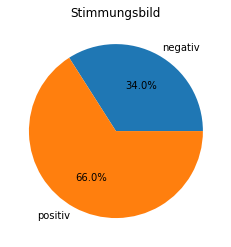

In [96]:
vf.plot_pie([negative_count, positive_count], labels=labels)

#### 3.1.4 Features

Jetzt fehlt nur noch eine Eingabe für unseren überwachten Klassifikator. Da diese auf Features und Labels angewiesen ist, strukturieren wir sie als einfaches Schlüsselwertpaar mit den Wörtern als Schlüssel und der Stimmung als Wert.

In [97]:
def featurize(tweet):
    """Single word features"""
    
    return dict([(word, True) for word in tweet])

In [98]:
negative_features = tweets.loc[tweets['Label'] == 'negativ']['Token'].apply(featurize)
negative_set = [(tweet_dict, 'negativ') for tweet_dict in negative_features]

positive_features = tweets.loc[tweets['Label'] == 'positiv']['Token'].apply(featurize)
positive_set = [(tweet_dict, 'positiv') for tweet_dict in positive_features]

train_set = negative_set + positive_set
del negative_set, positive_set

### 3.2 Textdaten klassifizieren

Die folgende Abbildung veranschaulicht den Unterschied zwischen ihnen.

![Image](https://datasolut.com/wp-content/uploads/2020/08/Supervised-vs-unsupervised-learning.png)

#### 3.2.1 Überwachte Klassifikation

Mithilfe des [Naive Bayes](https://www.nltk.org/_modules/nltk/classify/naivebayes.html) Algorithmus führen wir eine überwachte Klassifizierung aus. Dabei versucht der Klassifikator eine Gruppe von Features ihrer wahrscheinlichsten Klasse (hier: Stimmung) zuzuordnen. In unserem Fall repräsentiert jedes Wort im Tweet ein Feature, wonach ein Feature-Set alle Wörter eines Tweets beinhaltet. In der folgenden Animation wird der Lernprozess des Klassifikators auf Basis von drei Klassen und zwei Features veranschaulicht:

![Naive Bayes](https://upload.wikimedia.org/wikipedia/commons/b/b4/Naive_Bayes_Classifier.gif)

Im Folgenden wird unser `nbclassifier` Klassifikator mithilfe von NLTK erzeugt und trainiert.

In [99]:
from nltk import NaiveBayesClassifier, classify

In [100]:
nbclassifier = NaiveBayesClassifier.train(train_set)

**Aufgabe: Wie lautet das informativste Wort des `nbclassifier` Klassifikators?**

In [101]:
#hideInput
texte_lm.show_task(321)

Output()

Output()

Output()

In [102]:
#solution
nbclassifier.show_most_informative_features()

Most Informative Features
              gefährlich = True           negati : positi =    230.7 : 1.0
                  gefahr = True           negati : positi =    204.3 : 1.0
                gefahren = True           negati : positi =    189.3 : 1.0
                 falsche = True           negati : positi =    177.7 : 1.0
              schlechter = True           negati : positi =    141.5 : 1.0
                  kriege = True           negati : positi =    118.2 : 1.0
                  falsch = True           negati : positi =    101.9 : 1.0
                 schaden = True           negati : positi =     99.6 : 1.0
                schlecht = True           negati : positi =     96.5 : 1.0
                  gewalt = True           negati : positi =     89.3 : 1.0


**Aufgabe: Wie gut schlägt sich der `nbclassifier` Klassifikator auf den Trainingsdaten?**

In [103]:
#hideInput
texte_lm.show_task(322)

Output()

Output()

Output()

In [104]:
#solution
classify.accuracy(nbclassifier, train_set)

0.7986838763815434

#### 3.2.2 Unüberwachte Klassifikation

Mithilfe von [K-means](https://www.nltk.org/_modules/nltk/cluster/kmeans.html) Clustering führen wir eine unüberwachte Klassifizierung aus. Dabei versucht der Klassifikator ähnliche Vektoren zu einem Cluster (hier: Stimmungen) zu gruppieren. In unserem Fall repräsentiert jedes Wort eines Tweets eine Dimension des Vektors, wonach alle Wörter eines Tweets einen n-dimensionalen Spaltenvektor bilden. In der folgenden Animation wird der Lernprozess des Klassifikators auf Basis von drei Clustern veranschaulicht:

![K-means](https://camo.githubusercontent.com/77a842161f9588166625169d1f0944e838837f19b105d7e55d235652cfcc3786/68747470733a2f2f692e696d6775722e636f6d2f6b3458636170492e676966)

Natürlich werden nicht immer gleich viele Wörter pro Tweet im Vokabular gefunden. Da unser unüberwachter Klassifikator eine konstante Eingabe benötigt, müssen wir uns auf eine Wortzahl einigen, die vom Modell pro Tweet einbezogen wird. Naheliegend entscheiden wir uns für die im Mittel gefundenen Wörter als `pad_size` und verdoppeln diese.

In [105]:
pad_size = int(pd.Series([len(vector) for vector in tweets['Vector']]).mean() * 2)
pad_size

4

Fehlende Werte werden mit der `pad()` Funktion wie folgt aufgefüllt.

In [106]:
def pad(tweet):
    """Pad vectors with zeros at the end"""
    
    tweet += [0.0] * (pad_size - len(tweet))
    
    return tweet[:pad_size]

In [107]:
tweets['Vector'] = tweets['Vector'].apply(pad)

Im Folgenden wird unser unüberwachter `kmclusterer` Klassifikator mithilfe von NLTK erzeugt und trainiert.

In [108]:
from nltk.cluster import KMeansClusterer, euclidean_distance

In [109]:
kmclusterer = KMeansClusterer(2, euclidean_distance, repeats=2, avoid_empty_clusters=True)

In [110]:
clusters = kmclusterer.cluster(tweets['Vector'].apply(np.array), True)

**Aufgabe: Hinter welcher Funktion verstecken sich die Zentren unseres `kmclusterer` Klassifikators?**

In [111]:
#hideInput
texte_lm.show_task(323)

Output()

Output()

Output()

In [112]:
#solution
means = kmclusterer.means()

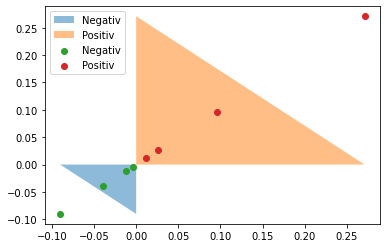

In [113]:
vf.plot_clusters(means)

<div style="background-color: #150458; padding: 5px; width: 100%;"></div>

## 4. Verwendung

[Zurück zur Übersicht](#Lernmodul-zur-Verarbeitung-und-Analyse-von-Textdaten)

In der Verwendungsdomäne werden zum Abschluss die Stimmung eigener Tweets vorhergesagt.

Welche Schritte ein Tweet innerhalb der Verwendung durchläuft verdeutlicht die folgende Abbildung:

![Model](./img/usage_flow.png)

### 4.1 Textdaten vorhersagen

Exemplarisch wird ein frei erfundener negativer Tweet betrachtet:

> Was für ein schlechtes Lernmodul

In [114]:
negative = "Was für ein schlechtes Lernmodul"

Ebenfalls wird ein positives Beispiel betrachtet:

> Was für ein gutes Lernmodul

In [115]:
positive = "Was für ein gutes Lernmodul"

Im produktiven Einsatz müssten diese Beispiele ebenfalls die Datendomäne durchlaufen, was wir uns in diesem Fall ersparen.

In [116]:
tweets = tweets.merge(tweets_copy.to_frame(name='Text'), left_index=True, right_index=True)

Zuletzt werden 100 zufällige Tweets aus dem Datensatz vorhergesagt.

In [117]:
train_sample = tweets.sample(100) # 100 random tweets

#### 4.1.1 Überwachter Klassifikator

[Zurück zur überwachten Klassifikation](#3.2.1-Überwachte-Klassifikation)

Welche Stimmung drückt unser negatives Beispiel nach Vorhersage der überwachten Klassifizierung aus?

In [118]:
nbclassifier.classify(featurize(split(lower(negative))))

'negativ'

Welche Stimmung drückt unser positives Beispiel nach Vorhersage der überwachten Klassifizierung aus?

In [119]:
nbclassifier.classify(featurize(split(lower(positive))))

'positiv'

Wie schlägt sich unser überwachter Klassifikator im Detail? Dafür klassifizieren wir beispielhaft 100 Tweets über die `supervised_classifier()` Funktion.

#	Soll	Ist	∆	Tweet
152470	negativ	negativ	True	@king_luger Versteh net warum der Kameramann ihm nicht direkt n Ziegelstein gegen den Kopf geworfen 
104622	positiv	positiv	True	Stehen schon die Taschentücher zum wegwischen bereit, @jreichelt?
81077	positiv	positiv	True	Nur noch 2 Tage Zeit, sich für den #HRStartupAward zu bewerben: https://t.co/e1HZtD2Z3T.Wir freuen u
10857	positiv	negativ	False	#Hopp-Schmähungen- #bayernmunchen-Fans: „Unterbrechung überzogen und absurd“ – „Man muss den Wortlau
127721	positiv	negativ	False	Es ist ja schön und gut, dass man versucht, die Beschränkungen zur Eindämmung von #COVID19 nur so we
90061	positiv	positiv	True	Ich habe gerade ein höheres Level erreicht. Mach mit und wir wachsen zusammen schneller! https://t.c
57086	positiv	negativ	False	@midvinter_holz @AVM_DE DuRcH DiE NeUe fIrMwArE KöNnEn wIr dIe fUnKtIoNsWeIßE NiChT SiChErStElLeN.
127269	positiv	positiv	True	Hallo ihr Lieben! Ich bräuchte ganz dringend eure Hilfe.Nachhilfekind hat große Schwieri

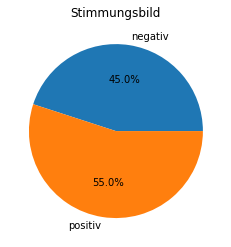

In [120]:
mf.supervised_classifier(train_sample, nbclassifier, labels) # On Train

#### Unüberwachter Klassifikator

[Zurück zur unüberwachten Klassifikation](#3.2.2-Unüberwachte-Klassifikation)

Welche Stimmung drückt unser negatives Beispiel nach Vorhersage der unüberwachten Klassifizierung aus?

In [121]:
labels[kmclusterer.classify(pad(vectorize(split(lower(negative)))))]

'negativ'

Welche Stimmung drückt unser positives Beispiel nach Vorhersage der unüberwachten Klassifizierung aus?

In [122]:
labels[kmclusterer.classify(pad(vectorize(split(lower(positive)))))]

'positiv'

Wie schlägt sich unser unüberwachter Klassifikator im Detail? Dafür klassifizieren 100 zufällig ausgewählte Tweets über die `unsupervised_classifier()` Funktion.

#	Soll	Ist	∆	Tweet
152470	negativ	negativ	True	@king_luger Versteh net warum der Kameramann ihm nicht direkt n Ziegelstein gegen den Kopf geworfen 
104622	positiv	negativ	False	Stehen schon die Taschentücher zum wegwischen bereit, @jreichelt?
81077	positiv	positiv	True	Nur noch 2 Tage Zeit, sich für den #HRStartupAward zu bewerben: https://t.co/e1HZtD2Z3T.Wir freuen u
10857	positiv	negativ	False	#Hopp-Schmähungen- #bayernmunchen-Fans: „Unterbrechung überzogen und absurd“ – „Man muss den Wortlau
127721	positiv	positiv	True	Es ist ja schön und gut, dass man versucht, die Beschränkungen zur Eindämmung von #COVID19 nur so we
90061	positiv	positiv	True	Ich habe gerade ein höheres Level erreicht. Mach mit und wir wachsen zusammen schneller! https://t.c
57086	positiv	negativ	False	@midvinter_holz @AVM_DE DuRcH DiE NeUe fIrMwArE KöNnEn wIr dIe fUnKtIoNsWeIßE NiChT SiChErStElLeN.
127269	positiv	positiv	True	Hallo ihr Lieben! Ich bräuchte ganz dringend eure Hilfe.Nachhilfekind hat große Schwieri

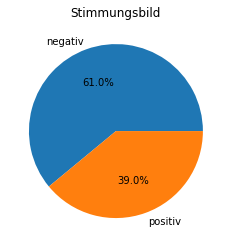

In [123]:
mf.unsupervised_classifier(train_sample, kmclusterer, labels) # On Train

<div style="background-color: #150458; padding: 5px; width: 100%;"></div>

## 5. Abschluss

[Zurück zur Übersicht](#Lernmodul-zur-Verarbeitung-und-Analyse-von-Textdaten)

Zum Abschluss des Lernmoduls folgen einige Verständnisfragen, bevor deine Gesamtpunktzahl errechnet wird...

**Aufgabe: Welche Eingabe benötigt der überwachte `nbclassifier` Klassifikator?**

In [124]:
texte_lm.show_task(501)

Output()

Output()

Output()

**Aufgabe: Welche Eingabe benötigt der unüberwachte `kmclusterer` Klassifikator?**

In [125]:
texte_lm.show_task(502)

Output()

Output()

Output()

**Ergebnis:**

Du hast folgende Punktzahl erreicht...

In [126]:
texte_lm.get_score()

0.0

**Zusammenfassung:**

Das vergangene Lernmodul hat einen Einblick in die Texterkennung als Teilgebiet des _NLP_ gegeben. Im Zuge einer Stimmungsanalyse von aktuellen Beiträgen auf Twitter, haben wir zunächst Rohdaten beschafft und erkundet. Irrelevante Inhalte wurden auf Basis von Sonderzeichen, URL-Schema und der Länge des resultierenden Beitrags, identifiziert und verworfen, sodass die Rohdaten als nächstes in ein Modell eingebettet wurden. Dieses Modell klassifizierte die Daten entweder überwacht oder unüberwacht, was verschiedene Einbettungsschritte hervorrief. Letztendlich konnte sowohl der überwachte als auch der unüberwachte Klassifikator die Stimmung eines Tweets einschätzen und vorhersagen.

**Glossar:**

* NLP (Natural Language Processing)
    * Verarbeitung menschlicher Sprache
* NLTK (Natural Language ToolKit)
    * Python-Bibliothek für die Verarbeitung menschlicher Sprache

**Weiterführende Lernmodule:**

- [Lernmodul zu Datamining mit Scikit Learn](https://projectbase.medien.hs-duesseldorf.de/eild.nrw-module/lernmodul-scikit)

**Weiterführende Inhalte:**

* Leitfäden
    * [Cookbook by NLTK](https://www.nltk.org/book/)
    * [Recurrent neural networks by TensorFlow](https://www.tensorflow.org/guide/keras/rnn?hl=en)
    * [Text classification by Google Developers](https://developers.google.com/machine-learning/guides/text-classification)
* Vektorisierung
    * [TextBlob](https://textblob.readthedocs.io/en/dev/)
    * [Word2Vec](https://radimrehurek.com/gensim/models/word2vec.html)
* Tutorials
    * [Basic text classification by TensorFlow](https://www.tensorflow.org/tutorials/keras/text_classification?hl=en)

**Referenzen:**

<a id="1">[1]</a> Nane Kratzke. (2020). Monthly Samples of German Tweets (Version 2020-04) [Data set]. Zenodo. http://doi.org/10.5281/zenodo.3783478

<a id="2">[2]</a> R. Remus, U. Quasthoff & G. Heyer: SentiWS - a Publicly Available German-language Resource for Sentiment Analysis. In: Proceedings of the 7th International Language Resources and Evaluation (LREC'10), pp. 1168-1171, 2010